## Бгатцев А.В ИУ5-21 РК1

# Задание

Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?



# Описание набора данных

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline 

data = pd.read_csv('data/toy_dataset.csv', sep=",")
data = pd.get_dummies(data)
data.head()

,Number,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
0,1,41,40367.0,0,0,1,0,0,0,0,0,0,1,1,0
1,2,54,45084.0,0,0,1,0,0,0,0,0,0,1,1,0
2,3,42,52483.0,0,0,1,0,0,0,0,0,0,1,1,0
3,4,40,40941.0,0,0,1,0,0,0,0,0,0,1,1,0
4,5,46,50289.0,0,0,1,0,0,0,0,0,0,1,1,0


In [0]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(150000, 15)

In [0]:
# Список колонок с типами данных
data.dtypes

Number                    int64
Age                       int64
Income                  float64
City_Austin               uint8
City_Boston               uint8
City_Dallas               uint8
City_Los Angeles          uint8
City_Mountain View        uint8
City_New York City        uint8
City_San Diego            uint8
City_Washington D.C.      uint8
Gender_Female             uint8
Gender_Male               uint8
Illness_No                uint8
Illness_Yes               uint8
dtype: object

In [0]:
# Основные статистические характеристки набора данных
data.describe()

,Number,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273,0.081947,0.055340,0.131380,0.214487,0.094793,0.335380,0.03254,0.054133,0.441333,0.558667,0.919073,0.080927
std,43301.414527,11.572486,24989.500948,0.274284,0.228643,0.337817,0.410467,0.292930,0.472125,0.17743,0.226281,0.496548,0.496548,0.272723,0.272723
min,1.000000,25.000000,-654.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,35.000000,80867.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,75000.500000,45.000000,93655.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,112500.250000,55.000000,104519.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000
max,150000.000000,65.000000,177157.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Определим уникальные значения для целевого признака
data['Gender_Male'].unique()

array([1, 0], dtype=uint64)

# Визуальное исследование датасета

### Диаграмма рассеяния

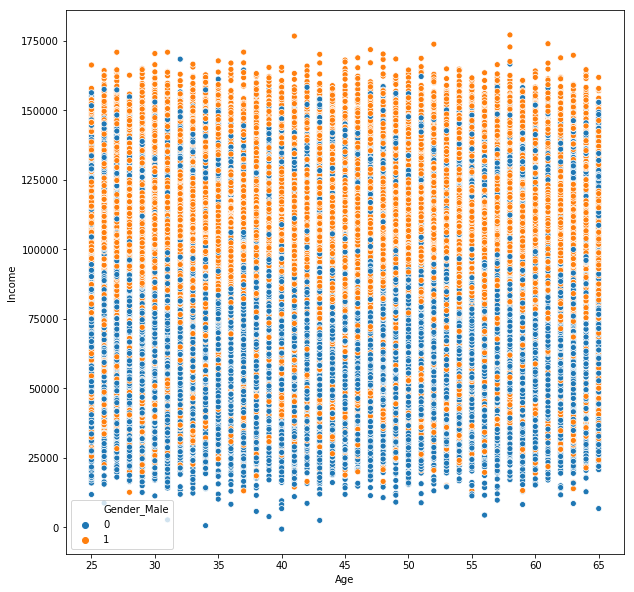

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Age', y='Income', data=data, hue='Gender_Male')

### Гистограмма

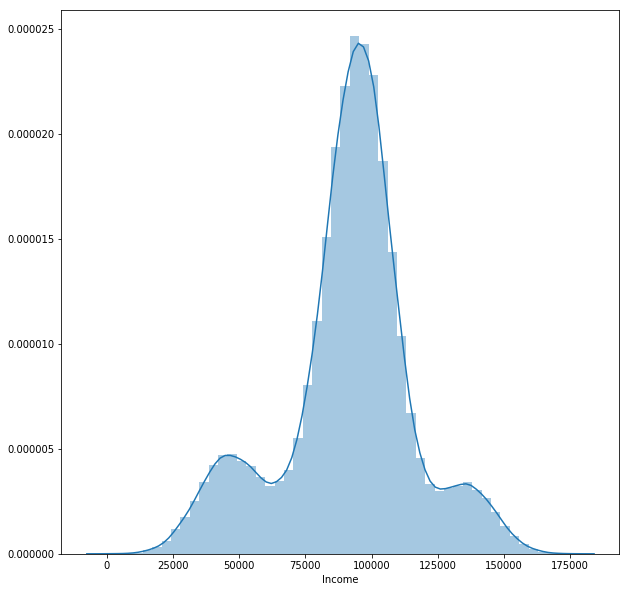

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Income'])

### Jointplot

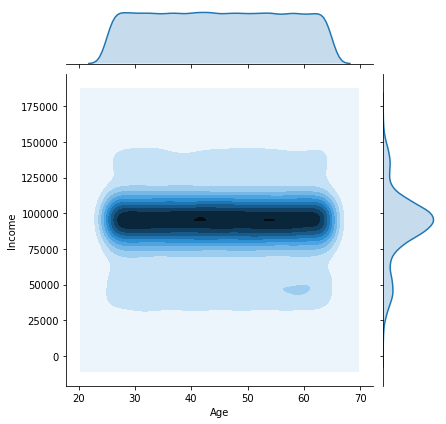

In [0]:
sns.jointplot(x='Age', y='Income', data=data, kind="kde")

### "Парные диаграммы"

In [0]:
sns.pairplot(data)

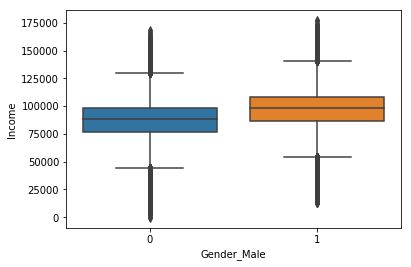

In [0]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Gender_Male', y='Income', data=data)

### Violin plot

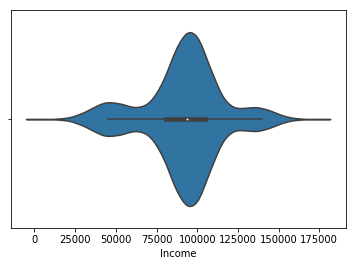

In [0]:
sns.violinplot(x=data['Income'])

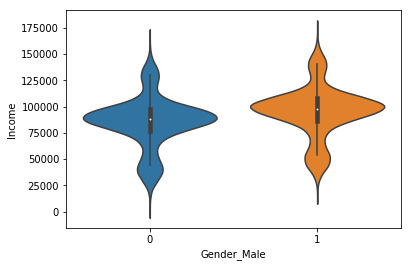

In [0]:
# Распределение параметра
sns.violinplot(x='Gender_Male', y='Income', data=data)

# Информация о корреляции признаков

In [0]:
data.corr()

,Number,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
Number,1.000000,-0.003448,0.410460,0.475073,0.254643,-0.585114,0.133957,0.256309,-0.494444,0.255255,0.297052,-0.001272,0.001272,-0.003138,0.003138
Age,-0.003448,1.000000,-0.001318,-0.007718,0.005179,0.003648,0.001982,0.001190,-0.001724,0.000237,-0.003049,0.003653,-0.003653,-0.001811,0.001811
Income,0.410460,-0.001318,1.000000,-0.011660,0.002923,-0.715907,0.083880,0.567528,0.159312,0.069745,-0.193966,-0.198888,0.198888,-0.000298,0.000298
City_Austin,0.475073,-0.007718,-0.011660,1.000000,-0.072313,-0.116193,-0.156119,-0.096682,-0.212233,-0.054793,-0.071474,-0.001952,0.001952,-0.001448,0.001448
City_Boston,0.254643,0.005179,0.002923,-0.072313,1.000000,-0.094131,-0.126475,-0.078324,-0.171935,-0.044389,-0.057903,0.003024,-0.003024,-0.001521,0.001521
City_Dallas,-0.585114,0.003648,-0.715907,-0.116193,-0.094131,1.000000,-0.203223,-0.125853,-0.276269,-0.071325,-0.093039,0.000304,-0.000304,-0.001315,0.001315
City_Los Angeles,0.133957,0.001982,0.083880,-0.156119,-0.126475,-0.203223,1.000000,-0.169098,-0.371198,-0.095833,-0.125009,0.002812,-0.002812,0.002123,-0.002123
City_Mountain View,0.256309,0.001190,0.567528,-0.096682,-0.078324,-0.125853,-0.169098,1.000000,-0.229878,-0.059348,-0.077416,0.000031,-0.000031,-0.002278,0.002278
City_New York City,-0.494444,-0.001724,0.159312,-0.212233,-0.171935,-0.276269,-0.371198,-0.229878,1.000000,-0.130279,-0.169941,-0.000858,0.000858,0.002598,-0.002598
City_San Diego,0.255255,0.000237,0.069745,-0.054793,-0.044389,-0.071325,-0.095833,-0.059348,-0.130279,1.000000,-0.043874,-0.004249,0.004249,0.000138,-0.000138


In [0]:
data.corr(method='pearson')

,Number,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
Number,1.000000,-0.003448,0.410460,0.475073,0.254643,-0.585114,0.133957,0.256309,-0.494444,0.255255,0.297052,-0.001272,0.001272,-0.003138,0.003138
Age,-0.003448,1.000000,-0.001318,-0.007718,0.005179,0.003648,0.001982,0.001190,-0.001724,0.000237,-0.003049,0.003653,-0.003653,-0.001811,0.001811
Income,0.410460,-0.001318,1.000000,-0.011660,0.002923,-0.715907,0.083880,0.567528,0.159312,0.069745,-0.193966,-0.198888,0.198888,-0.000298,0.000298
City_Austin,0.475073,-0.007718,-0.011660,1.000000,-0.072313,-0.116193,-0.156119,-0.096682,-0.212233,-0.054793,-0.071474,-0.001952,0.001952,-0.001448,0.001448
City_Boston,0.254643,0.005179,0.002923,-0.072313,1.000000,-0.094131,-0.126475,-0.078324,-0.171935,-0.044389,-0.057903,0.003024,-0.003024,-0.001521,0.001521
City_Dallas,-0.585114,0.003648,-0.715907,-0.116193,-0.094131,1.000000,-0.203223,-0.125853,-0.276269,-0.071325,-0.093039,0.000304,-0.000304,-0.001315,0.001315
City_Los Angeles,0.133957,0.001982,0.083880,-0.156119,-0.126475,-0.203223,1.000000,-0.169098,-0.371198,-0.095833,-0.125009,0.002812,-0.002812,0.002123,-0.002123
City_Mountain View,0.256309,0.001190,0.567528,-0.096682,-0.078324,-0.125853,-0.169098,1.000000,-0.229878,-0.059348,-0.077416,0.000031,-0.000031,-0.002278,0.002278
City_New York City,-0.494444,-0.001724,0.159312,-0.212233,-0.171935,-0.276269,-0.371198,-0.229878,1.000000,-0.130279,-0.169941,-0.000858,0.000858,0.002598,-0.002598
City_San Diego,0.255255,0.000237,0.069745,-0.054793,-0.044389,-0.071325,-0.095833,-0.059348,-0.130279,1.000000,-0.043874,-0.004249,0.004249,0.000138,-0.000138


In [0]:
data.corr(method='kendall')

,Number,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
Number,1.000000,-0.002319,0.194147,0.387897,0.207916,-0.477745,0.109376,0.209276,-0.403713,0.208416,0.242543,-0.001039,0.001039,-0.002562,0.002562
Age,-0.002319,1.000000,-0.000978,-0.006382,0.004267,0.003009,0.001647,0.000985,-0.001426,0.000204,-0.002515,0.003002,-0.003002,-0.001498,0.001498
Income,0.194147,-0.000978,1.000000,-0.043284,-0.019105,-0.474030,0.059285,0.410037,0.138877,0.072100,-0.205191,-0.206447,0.206447,-0.000884,0.000884
City_Austin,0.387897,-0.006382,-0.043284,1.000000,-0.072313,-0.116193,-0.156119,-0.096682,-0.212233,-0.054793,-0.071474,-0.001952,0.001952,-0.001448,0.001448
City_Boston,0.207916,0.004267,-0.019105,-0.072313,1.000000,-0.094131,-0.126475,-0.078324,-0.171935,-0.044389,-0.057903,0.003024,-0.003024,-0.001521,0.001521
City_Dallas,-0.477745,0.003009,-0.474030,-0.116193,-0.094131,1.000000,-0.203223,-0.125853,-0.276269,-0.071325,-0.093039,0.000304,-0.000304,-0.001315,0.001315
City_Los Angeles,0.109376,0.001647,0.059285,-0.156119,-0.126475,-0.203223,1.000000,-0.169098,-0.371198,-0.095833,-0.125009,0.002812,-0.002812,0.002123,-0.002123
City_Mountain View,0.209276,0.000985,0.410037,-0.096682,-0.078324,-0.125853,-0.169098,1.000000,-0.229878,-0.059348,-0.077416,0.000031,-0.000031,-0.002278,0.002278
City_New York City,-0.403713,-0.001426,0.138877,-0.212233,-0.171935,-0.276269,-0.371198,-0.229878,1.000000,-0.130279,-0.169941,-0.000858,0.000858,0.002598,-0.002598
City_San Diego,0.208416,0.000204,0.072100,-0.054793,-0.044389,-0.071325,-0.095833,-0.059348,-0.130279,1.000000,-0.043874,-0.004249,0.004249,0.000138,-0.000138


In [0]:
data.corr(method='spearman')

,Number,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
Number,1.000000,-0.003441,0.286131,0.475073,0.254643,-0.585114,0.133957,0.256309,-0.494444,0.255255,0.297052,-0.001272,0.001272,-0.003138,0.003138
Age,-0.003441,1.000000,-0.001452,-0.007722,0.005162,0.003641,0.001993,0.001191,-0.001725,0.000246,-0.003043,0.003632,-0.003632,-0.001812,0.001812
Income,0.286131,-0.001452,1.000000,-0.053011,-0.023399,-0.580560,0.072608,0.502185,0.170087,0.088303,-0.251304,-0.252843,0.252843,-0.001082,0.001082
City_Austin,0.475073,-0.007722,-0.053011,1.000000,-0.072313,-0.116193,-0.156119,-0.096682,-0.212233,-0.054793,-0.071474,-0.001952,0.001952,-0.001448,0.001448
City_Boston,0.254643,0.005162,-0.023399,-0.072313,1.000000,-0.094131,-0.126475,-0.078324,-0.171935,-0.044389,-0.057903,0.003024,-0.003024,-0.001521,0.001521
City_Dallas,-0.585114,0.003641,-0.580560,-0.116193,-0.094131,1.000000,-0.203223,-0.125853,-0.276269,-0.071325,-0.093039,0.000304,-0.000304,-0.001315,0.001315
City_Los Angeles,0.133957,0.001993,0.072608,-0.156119,-0.126475,-0.203223,1.000000,-0.169098,-0.371198,-0.095833,-0.125009,0.002812,-0.002812,0.002123,-0.002123
City_Mountain View,0.256309,0.001191,0.502185,-0.096682,-0.078324,-0.125853,-0.169098,1.000000,-0.229878,-0.059348,-0.077416,0.000031,-0.000031,-0.002278,0.002278
City_New York City,-0.494444,-0.001725,0.170087,-0.212233,-0.171935,-0.276269,-0.371198,-0.229878,1.000000,-0.130279,-0.169941,-0.000858,0.000858,0.002598,-0.002598
City_San Diego,0.255255,0.000246,0.088303,-0.054793,-0.044389,-0.071325,-0.095833,-0.059348,-0.130279,1.000000,-0.043874,-0.004249,0.004249,0.000138,-0.000138


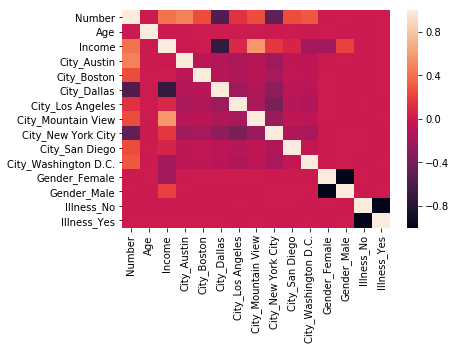

In [0]:
sns.heatmap(data.corr())

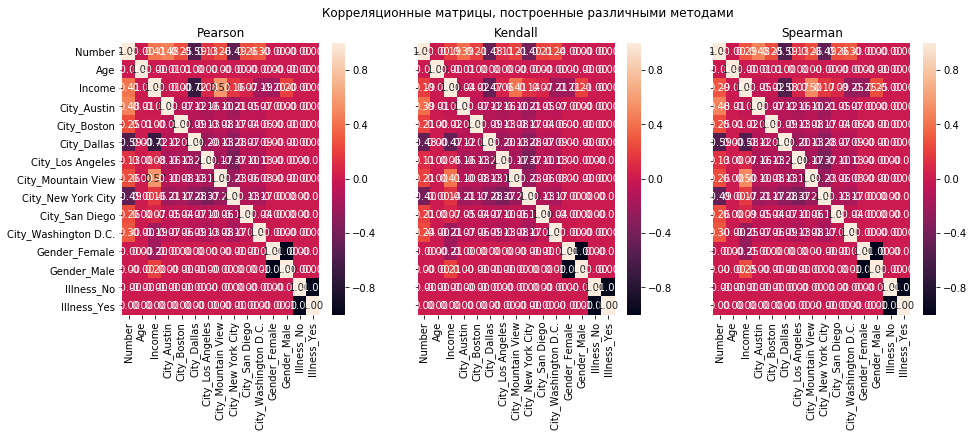

In [0]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')